In [ ]:
#!pip3 install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import glob
import re
import pandas as pd
from PIL import Image

(536, 559, 3)


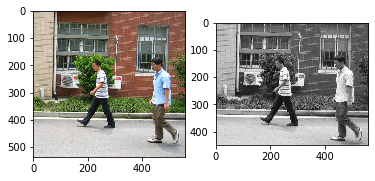

In [3]:
# Visualize one picture and put it in gray scale, as the colors are not relevant for this task.
# Being able to do this with one picture, I will later on define a function that will do this with all of them.

im = cv2.imread("./Imagenes/PennFudanPed/PNGImages/FudanPed00001.png")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(im)

im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,2)
plt.imshow(im[50:500], cmap="gray")

In [3]:
# Define a function that will load all images in PennFudanPed file and put them in gray scale.
# The function will receive one parameter, i.e. the path of the image we want to load.

def loadImageAsGray(imagePath):
    im = cv2.imread(imagePath)
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [4]:
# Get all images from the PennFudanPed file and apply the loadImageAsGray function to all of them as they are being downloaded.
def getDataset(path):
    
    images_dict = {}

    for i in glob.glob(path):
        image = i.split('/')[-1]
        print(f"Loading file {i}")
        if image in images_dict:
            images_dict[image].append(loadImageAsGray(i))
        else:
            images_dict[image] = [loadImageAsGray(i)]
    return images_dict

images_dict = getDataset('./Imagenes/PennFudanPed/PNGImages/*.png')

Loading file ./PennFudanPed/PNGImages/FudanPed00062.png
Loading file ./PennFudanPed/PNGImages/PennPed00059.png
Loading file ./PennFudanPed/PNGImages/PennPed00071.png
Loading file ./PennFudanPed/PNGImages/PennPed00065.png
Loading file ./PennFudanPed/PNGImages/PennPed00064.png
Loading file ./PennFudanPed/PNGImages/PennPed00070.png
Loading file ./PennFudanPed/PNGImages/PennPed00058.png
Loading file ./PennFudanPed/PNGImages/FudanPed00063.png
Loading file ./PennFudanPed/PNGImages/FudanPed00049.png
Loading file ./PennFudanPed/PNGImages/FudanPed00061.png
Loading file ./PennFudanPed/PNGImages/PennPed00066.png
Loading file ./PennFudanPed/PNGImages/PennPed00072.png
Loading file ./PennFudanPed/PNGImages/PennPed00073.png
Loading file ./PennFudanPed/PNGImages/PennPed00067.png
Loading file ./PennFudanPed/PNGImages/FudanPed00060.png
Loading file ./PennFudanPed/PNGImages/FudanPed00074.png
Loading file ./PennFudanPed/PNGImages/FudanPed00048.png
Loading file ./PennFudanPed/PNGImages/FudanPed00070.png
Lo

Loading file ./PennFudanPed/PNGImages/FudanPed00052.png
Loading file ./PennFudanPed/PNGImages/PennPed00055.png
Loading file ./PennFudanPed/PNGImages/PennPed00041.png
Loading file ./PennFudanPed/PNGImages/PennPed00069.png
Loading file ./PennFudanPed/PNGImages/PennPed00096.png
Loading file ./PennFudanPed/PNGImages/PennPed00082.png
Loading file ./PennFudanPed/PNGImages/PennPed00083.png
Loading file ./PennFudanPed/PNGImages/PennPed00068.png
Loading file ./PennFudanPed/PNGImages/PennPed00040.png
Loading file ./PennFudanPed/PNGImages/PennPed00054.png
Loading file ./PennFudanPed/PNGImages/FudanPed00053.png
Loading file ./PennFudanPed/PNGImages/FudanPed00047.png


In [5]:
images_dict

{'FudanPed00062.png': [array([[ 54,  60,  59, ..., 103, 103, 102],
         [ 55,  60,  59, ..., 104, 104, 105],
         [ 54,  58,  59, ..., 105, 105, 106],
         ...,
         [156, 153, 149, ..., 109, 110, 106],
         [167, 158, 153, ..., 111, 113, 107],
         [172, 172, 172, ..., 104, 107, 105]], dtype=uint8)],
 'PennPed00059.png': [array([[ 27,  36,  44, ...,  57,  71,  87],
         [ 27,  33,  40, ...,  38,  65, 103],
         [ 27,  30,  36, ...,  25,  35,  51],
         ...,
         [182, 185, 188, ..., 195, 196, 193],
         [190, 186, 183, ..., 197, 195, 195],
         [190, 186, 183, ..., 195, 193, 193]], dtype=uint8)],
 'PennPed00071.png': [array([[ 68,  69,  72, ...,  74,  56,  39],
         [ 69,  68,  68, ...,  69,  69,  69],
         [ 77,  73,  70, ..., 120, 138, 148],
         ...,
         [102, 104, 109, ..., 249, 248, 248],
         [116, 117, 118, ..., 233, 231, 230],
         [106, 107, 106, ..., 197, 195, 192]], dtype=uint8)],
 'PennPed00065.png': 

In [6]:
'''
img_array = []
for i in images_dict.values():
    img_array.append(i)
'''

'\nimg_array = []\nfor i in images_dict.values():\n    img_array.append(i)\n'

In [ ]:
'''
img_names = []
for i in images_dict.keys():
    img_names.append(i.replace('.png', ''))
'''

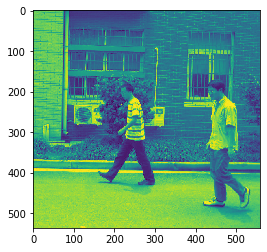

In [7]:
# Check that all images have been downloaded correctly.
# len(images_dict)
# Test to see how can I access each image inside images_dict.
# Note that the pixels of each image is an array corresponding to the value of the dictionary's key, i.e. each image file (.png).

test = images_dict['FudanPed00001.png'][0]
plt.imshow(test)

In [8]:
def getAnnotations(path):
    
    annotations_dict = {}

    for i in glob.glob(path):
        annotation = i.split('/')[-1]
        print(f"Loading file {i}")
        if annotation in annotations_dict:
            annotations_dict[annotation].append(open(i, 'r').read())
        else:
            annotations_dict[annotation] = [open(i, 'r').read()]
    return annotations_dict

annotations_dict = getAnnotations('./Imagenes/PennFudanPed/Annotation/*.txt')

Loading file ./PennFudanPed/Annotation/PennPed00013.txt
Loading file ./PennFudanPed/Annotation/PennPed00007.txt
Loading file ./PennFudanPed/Annotation/FudanPed00014.txt
Loading file ./PennFudanPed/Annotation/FudanPed00028.txt
Loading file ./PennFudanPed/Annotation/FudanPed00029.txt
Loading file ./PennFudanPed/Annotation/FudanPed00015.txt
Loading file ./PennFudanPed/Annotation/FudanPed00001.txt
Loading file ./PennFudanPed/Annotation/PennPed00006.txt
Loading file ./PennFudanPed/Annotation/PennPed00012.txt
Loading file ./PennFudanPed/Annotation/PennPed00004.txt
Loading file ./PennFudanPed/Annotation/PennPed00010.txt
Loading file ./PennFudanPed/Annotation/PennPed00038.txt
Loading file ./PennFudanPed/Annotation/FudanPed00017.txt
Loading file ./PennFudanPed/Annotation/FudanPed00003.txt
Loading file ./PennFudanPed/Annotation/FudanPed00002.txt
Loading file ./PennFudanPed/Annotation/FudanPed00016.txt
Loading file ./PennFudanPed/Annotation/PennPed00039.txt
Loading file ./PennFudanPed/Annotation/

In [9]:
annotations_dict

{'PennPed00013.txt': ['# Compatible with PASCAL Annotation Version 1.00\nImage filename : "PennFudanPed/PNGImages/PennPed00013.png"\nImage size (X x Y x C) : 564 x 385 x 3\nDatabase : "The Penn-Fudan-Pedestrian Database"\nObjects with ground truth : 4 { "PASpersonWalking" "PASpersonWalking" "PASpersonWalking" "PASpersonWalking" }\n# Note there may be some objects not included in the ground truth list for they are severe-occluded\n# or have very small size.\n# Top left pixel co-ordinates : (1, 1)\n# Details for pedestrian 1 ("PASpersonWalking")\nOriginal label for object 1 "PASpersonWalking" : "PennFudanPed"\nBounding box for object 1 "PASpersonWalking" (Xmin, Ymin) - (Xmax, Ymax) : (98, 79) - (210, 359)\nPixel mask for object 1 "PASpersonWalking" : "PennFudanPed/PedMasks/PennPed00013_mask.png"\n\n# Details for pedestrian 2 ("PASpersonWalking")\nOriginal label for object 2 "PASpersonWalking" : "PennFudanPed"\nBounding box for object 2 "PASpersonWalking" (Xmin, Ymin) - (Xmax, Ymax) : (25

In [10]:
def getPositions(file):
    # leer el texto
    with open('./Imagenes/PennFudanPed/Annotation/'+file) as f:  
        data = f.read()
    # lista de posiciones
    coord = re.findall(r'\(\d*,\s\d*\)\s\-\s\(\d*,\s\d*\)', data)
    # Lista (persons) de diccionarios (person). Habra tantos diccionarios como personas salgan en la foto.
    persons = []
    for string in coord:
        s = re.findall(r'\d+', string)
        person = {
            'Fname_annotation' : file.replace('.txt',''),
            'Xmin' : int(s[0]),
            'Ymin' : int(s[1]),
            'Xmax' : int(s[2]),
            'Ymax' : int(s[3])
        }
        persons.append(person)
   
    return persons 

In [11]:
# Lo uno todo en una lista unica (final)
final = []
for file in annotations_dict:
    final += getPositions(file)

In [12]:
# Creo un dataframe cuyas columnas seran las keys del diccionario 'person'
df_annotations = pd.DataFrame(final)
df_annotations

,Fname_annotation,Xmin,Ymin,Xmax,Ymax
0,PennPed00013,98,79,210,359
1,PennPed00013,259,96,364,359
2,PennPed00013,384,81,498,355
3,PennPed00013,215,91,257,193
4,PennPed00007,42,60,165,350
...,...,...,...,...,...
418,PennPed00022,216,152,354,416
419,PennPed00022,705,129,839,390
420,PennPed00022,345,162,424,342
421,PennPed00036,56,62,164,330


In [13]:
len(df_annotations)

423

In [ ]:
'''
Testing to see if it works for just one picture:

path = './PennFudanPed/PNGImages/'
def getPerson(imageName, Xmin, Ymin, Xmax, Ymax):
    #print(loadImageAsGray(path+imageName+'.png'))
    image = loadImageAsGray(path+imageName+'.png')
    persona = image[Ymin:Ymax, Xmin:Xmax]
    return persona

getPerson('PennPed00001',98,79,210,359)
'''

In [14]:
def getPersonv2(df,i):
    image = loadImageAsGray('./Imagenes/PennFudanPed/PNGImages/' + df['Fname_annotation'][i]+ '.png')
    persona = image[df['Ymin'][i]:df['Ymax'][i], df['Xmin'][i]:df['Xmax'][i]]
    return persona,df['Fname_annotation'][i]

In [15]:
for i in range(df_annotations.shape[0]):
    recortada,path = getPersonv2(df_annotations,i)
    cv2.imwrite('./Imagenes/fotos_recortadas/{}{}.png'.format(i,path),recortada)

In [ ]:
#plt.figure(figsize=(10, 5))

plt.imshow(test[182:431,160:302], cmap='gray')

# Coordenadas originales de la persona 1: (Xmin, Ymin) : (160, 182) - (Xmax, Ymax) : (302, 431)
plt.scatter(x=[302,160,302,160], y=[180,180,431,431], alpha=0.8, c='r')